# A Computer Vision Example

[10개로 분류된 패션 이미지](https://github.com/zalandoresearch/fashion-mnist#labels)를 분류하는 딥러닝

## Start Coding


In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


Fashion MNIST 데이터는 tf.keras datasets API에 들어있다. 

In [2]:
mnist = tf.keras.datasets.fashion_mnist

트레이닝과 테스트셋 가져온다.

In [3]:
(X_train, y_train),( X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

이미지는 숫자로 되어있다. 0부터 255까지의 숫자로 되어있다. 

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
X_train[0, : ,: ]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
import matplotlib.pyplot as plt


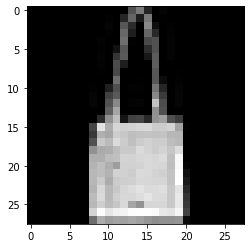

In [12]:
plt.imshow(  X_train[200] , cmap='gray'  )
plt.show()

In [13]:
y_train[200]

8

학습이 잘 되도록 0과 1사이의 값으로 노말라이징(normalizing) 한다.

In [14]:
X_train = X_train / 255.0

In [15]:
X_test = X_test / 255.0

이미지의 가로 세로를 전부 일렬로 만드는 작업이 flatten 이다.

모델을 만들어 보자.

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
from keras.layers import Flatten

**Sequential**: SEQUENCE layers 로 모델링

**Flatten**: 2차원, 3차원을 1차원으로 만드는것

**Dense**: 뉴런을 레이어에 붙인다.

각 레이어는 **activation function** 이 필요하다. 

**Relu**  액티베이션 함수 참고 https://docs.google.com/presentation/d/1DCOW7Lum2rnoPU7gxpznimrXV0DOJFc-YkkJt3jZC0U/edit#slide=id.ga8aac09587_0_2

**Softmax** 여러개의 값 중에서 가장 큰 값을 선택. [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 여기서 가장 큰 값을 1로 만들고 나머지는 0으로 만들어준다. [0,0,0,0,1,0,0,0,0] 


In [18]:
def build_model():
  model = Sequential()
  model.add( Flatten()  )
  model.add( Dense(128, 'relu') )
  model.add( Dense(64, 'relu') )
  model.add( Dense(10, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
# 2개로 분류하는 문제에서의 로스 펑션은 binary_crossentropy 를 사용.
# 3개 이상으로 분류하는 문제에서는, 두가지 방법이 있는데,
# y의 값을 확인하여 선택하는 것이다.

# 첫번째 방법은, y값이 레이블 인코딩으로 되어있으면, sparse_categorical_crossentropy
# 두번째 방법은, y값이 원핫인코딩으로 되어있으면, categorical_crossentropy

optimizer and loss function 으로 컴파일 한 후에  **model.fit** 함수로 학습한다.. 

In [21]:
model = build_model()

In [22]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4896 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3698 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3338 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2941 - accuracy: 0.8902


accuracy 가 약 90% 라는 뜻. 5 epochs 라 금방 끝났다.

학습에 사용하지 않는, 테스트 데이터를 통해서, 얼마나 정확도되 나오는지 확인해 본다.

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3661 - accuracy: 0.8647


[0.36606523394584656, 0.8647000193595886]

In [24]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
y_pred

array([[4.45672813e-05, 3.59187226e-07, 9.37915388e-07, ...,
        3.85268033e-02, 2.54621755e-05, 8.70098770e-01],
       [3.11156211e-04, 3.26517716e-06, 9.71695900e-01, ...,
        2.83851143e-09, 1.32116588e-06, 4.05067837e-08],
       [2.83272836e-08, 9.99999940e-01, 5.11404696e-10, ...,
        2.42429846e-18, 9.12290822e-15, 2.57028019e-16],
       ...,
       [1.68393235e-04, 2.28590105e-10, 2.67262330e-05, ...,
        2.52799259e-06, 9.99594152e-01, 2.86758894e-10],
       [6.96901168e-07, 9.99994338e-01, 9.04311150e-08, ...,
        4.75023558e-13, 3.85684096e-10, 2.57699747e-11],
       [1.06442334e-04, 1.07835160e-06, 2.58903776e-04, ...,
        1.63781072e-03, 3.34626297e-03, 2.99079420e-06]], dtype=float32)

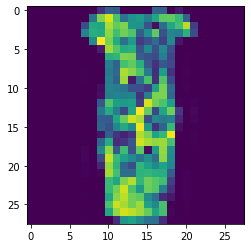

In [26]:
plt.imshow(X_test[100])
plt.show()

In [27]:
y_pred[100]

array([4.8287902e-03, 9.4129232e-04, 3.7395113e-04, 9.9066269e-01,
       4.4491919e-04, 2.3668621e-05, 2.6620841e-03, 2.5334755e-06,
       5.1348648e-05, 8.8147699e-06], dtype=float32)

In [28]:
y_pred[100].sum()

1.0

In [29]:
y_pred[100].argmax()

3

In [30]:
# 컨퓨전 매트릭스를 이용해서, 어떤것을 컴퓨터가 많이 헷갈려 하는지 파악한다.

In [31]:
from sklearn.metrics import confusion_matrix

In [33]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [38]:
y_pred = y_pred.argmax(axis = 1)

In [39]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[904,   3,   6,  30,   8,   2,  39,   0,   8,   0],
       [  4, 967,   1,  23,   3,   0,   1,   0,   1,   0],
       [ 38,   1, 732,  16, 186,   0,  27,   0,   0,   0],
       [ 34,   7,   3, 895,  48,   0,  11,   0,   2,   0],
       [  1,   1,  65,  31, 890,   0,  12,   0,   0,   0],
       [  0,   0,   0,   1,   0, 960,   0,  30,   1,   8],
       [229,   2, 101,  30, 181,   0, 448,   0,   9,   0],
       [  0,   0,   0,   0,   0,  27,   0, 959,   1,  13],
       [ 10,   1,   2,   6,   7,   2,   1,   3, 968,   0],
       [  0,   0,   0,   0,   0,  14,   1,  61,   0, 924]])

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_pred)

0.8647

In [46]:
(904+967+732+895+890+960+448+959+968+924  ) / cm.sum()

0.8647

In [47]:
import seaborn as sb

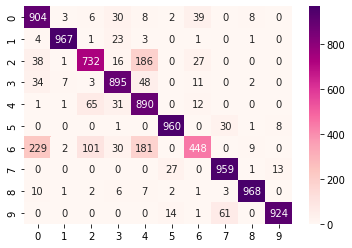

In [48]:
sb.heatmap(cm, annot=True, fmt='.0f', cmap='RdPu')
plt.show()

# Exploration Exercises

### Exercise 1:

테스트 이미지를 예측한 후, 첫번째 이미지에 대해서 예측한 결과를 출력한다. 

In [49]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [50]:
y_pred[0]

9

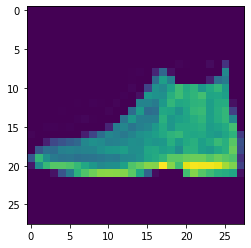

In [51]:
plt.imshow(X_test[0])
plt.show()

### 예측한 결과가 리스트로 나온다. 리스트는 무엇을 나타내는가 ?


   It's the probability that this item is each of the 10 classes


In [52]:
# ANN의 아웃풋의 노드(뉴런)수가 10개 이기 때문에,
# softmax 활성화 함수를 통해서, 0~1사이의 10개의 숫자가 나오게 되어있다. 

첫번째 이미지의 실제값을 출력한다.

In [53]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### 이 예측결과가 앵클부츠인지는, 예측결과로 나온 리스트를 보고 어떻게 알 수 있는가?



10번째 값이 가장 크니까, 레이블은 0부터라, 9 이다.

In [29]:
# numpy 의 argmax() 함수를 이용하면, 가장 큰값이 들어있는 곳의 인덱스를 얻을 수있다.

## Exercise 2: 
히든레이어를 1024개의 뉴런으로 바꿔서 실행해보자 


In [54]:
def build_model():
  model = Sequential()
  model.add( Flatten()  )
  model.add( Dense(1024, 'relu') )
  model.add( Dense(64, 'relu') )
  model.add( Dense(10, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

In [55]:
model = build_model()

In [56]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4821 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3608 - accuracy: 0.8678
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3259 - accuracy: 0.8798
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3025 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2805 - accuracy: 0.8964


In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3369 - accuracy: 0.8813


[0.3369227349758148, 0.8812999725341797]

### Question 1. 1024 개로 뉴런을 늘리면 어떤 일이 일어나는가?




In [58]:
# 2% 정도 성능향상

## Exercise 3: 

Flatten() layer를 지우면 어떻게 되는가?



In [59]:
def build_model():
  model = Sequential()
  model.add( Dense(128, 'relu') )
  model.add( Dense(64, 'relu') )
  model.add( Dense(10, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

In [60]:
model = build_model()

In [61]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5


ValueError: ignored

## Exercise 4: 

마지막 레이어를 10개가 아니라, 5개로 바꾸면 어떻게 되는가? 

In [65]:
def build_model():
  model = Sequential()
  model.add( Flatten() )
  model.add( Dense(128, 'relu') )
  model.add( Dense(64, 'relu') )
  model.add( Dense(5, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

In [66]:
model = build_model()

In [67]:
model.fit(X_test, y_test, epochs = 5)

Epoch 1/5


InvalidArgumentError: ignored

## Exercise 5: 

히든레이어를 늘려본다. 512개, 256개, 10개로 레이어 구성을 해보자. 

성능이 개선되는가?

## Exercise 6: 

epochs 의 횟수를 조정해 보자. 


Try 30 epochs  





In [68]:
def build_model():
  model = Sequential()
  model.add( Flatten() )
  model.add( Dense(128, 'relu') )
  model.add( Dense(64, 'relu') )
  model.add( Dense(10, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

In [69]:
model = build_model()

In [71]:
epoch_history = model.fit(X_train, y_train, epochs= 30 , validation_split= 0.2 )

1500/1500 [==============================] - 6s 4ms/step - loss: 0.1894 - accuracy: 0.9283 - val_loss: 0.3026 - val_accuracy: 0.8978
Epoch 13/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1811 - accuracy: 0.9300 - val_loss: 0.3004 - val_accuracy: 0.8956
Epoch 14/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1790 - accuracy: 0.9324 - val_loss: 0.3062 - val_accuracy: 0.8960
Epoch 15/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1729 - accuracy: 0.9339 - val_loss: 0.3198 - val_accuracy: 0.8986
Epoch 16/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1658 - accuracy: 0.9360 - val_loss: 0.3324 - val_accuracy: 0.8923
Epoch 17/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1636 - accuracy: 0.9367 - val_loss: 0.3379 - val_accuracy: 0.8954
Epoch 18/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1603 - accuracy: 0.9379 - val_loss: 0.3303 - val_accuracy: 0.8

In [73]:
epoch_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

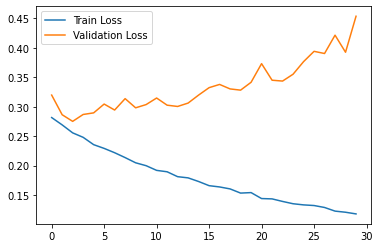

In [75]:
plt.plot( epoch_history.history['loss']  )
plt.plot( epoch_history.history['val_loss']  )
plt.legend( ['Train Loss', 'Validation Loss'] )
plt.show()

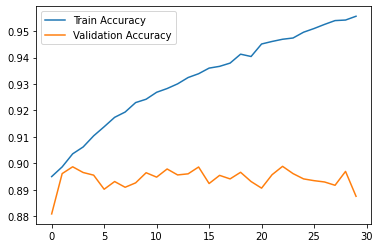

In [76]:
plt.plot( epoch_history.history['accuracy']  )
plt.plot( epoch_history.history['val_accuracy']  )
plt.legend( ['Train Accuracy', 'Validation Accuracy'] )
plt.show()

30 에포크를 했을때의 결과를 보면 어떠한 문제가 있다. 이러한 문제를 무엇이라고 하는가???

In [29]:
# 오버 핏팅 이라고 한다. Over Fitting

## Exercise 7: 

accuracy 나 loss 가, 우리가 원하는 특정 값이 되면 자동으로 학습을 멈추가 하고 싶다. 즉, 특정값에 도달하면 학습을 멈추게 할 수 있는 콜백기능을 제공한다. callbacks

In [77]:
# 어제 배웠던것은, early stopping : 특정횟수동안 성능개선이 없으면 멈춘다.

In [29]:
# val_accuracy 가 88% 가 넘으면 멈추도록 하고싶다.

In [80]:
def build_model():
  model = Sequential()
  model.add( Flatten() )
  model.add( Dense(128, 'relu') )
  model.add( Dense(64, 'relu') )
  model.add( Dense(10, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

In [78]:
class myCallback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self, epoch, logs={}) :
    if logs['val_accuracy'] > 0.88:
      print('\n내가 정한 정확도에 도달했으니, 학습을 멈춘다.')
      self.model.stop_training = True

In [79]:
my_cb = myCallback()

In [81]:
model = build_model()

In [82]:
epoch_history = model.fit(X_train, y_train, epochs=30, validation_split=0.2,
                          callbacks = [my_cb])

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5195 - accuracy: 0.8175 - val_loss: 0.4043 - val_accuracy: 0.8581
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3791 - accuracy: 0.8597 - val_loss: 0.3632 - val_accuracy: 0.8691
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3396 - accuracy: 0.8747 - val_loss: 0.3727 - val_accuracy: 0.8637
Epoch 4/30
1489/1500 [============================>.] - ETA: 0s - loss: 0.3172 - accuracy: 0.8825
내가 정한 정확도에 도달했으니, 학습을 멈춘다.
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3169 - accuracy: 0.8827 - val_loss: 0.3371 - val_accuracy: 0.8808


In [83]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3606 - accuracy: 0.8747


[0.36064639687538147, 0.8747000098228455]